<a href="https://colab.research.google.com/github/Aditya-737/hmm/blob/main/servo_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
servo = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [ ]:
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
y = servo ['Class']

In [ ]:
y.shape

(167,)

In [ ]:
x = servo [['Motor' , 'Screw' , 'Pgain' , 'Vgain']]

In [ ]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [ ]:
x = servo.drop('Class', axis=1)

In [ ]:
x.shape

(167, 4)

In [ ]:
servo.shape

(167, 5)

In [ ]:
servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [ ]:
servo[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [ ]:
servo.replace({'Motor': {'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
servo.replace({'Screw': {'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(x,y ,)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((125, 4), (42, 4), (125,), (42,))

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train , y_train)

LinearRegression()

In [ ]:
model.intercept_

85.37939651453982

In [ ]:
model.coef_

array([ -2.06061427,  -2.67742646, -17.6314933 ,   6.95481188])

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

8.210780994817213

In [ ]:
r2_score(y_test,y_pred)

0.5047371754801642

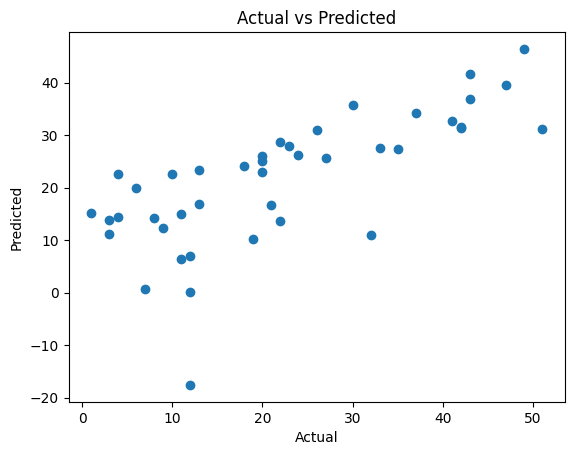

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
x_new=servo.sample(1)

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain,Class
33,2,0,6,2,12


In [ ]:
x_new.shape

(1, 5)

In [ ]:
x_new=x_new.drop('Class',axis=1)

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain
33,2,0,6,2


In [ ]:
x_new.shape

(1, 4)

In [ ]:
y_pred_new=model.predict(x_new)

In [ ]:
y_pred_new

array([-10.62116807])